# The Sparks Foundation

# Data science and Business Analytics Intern (July-2022)

# Author: Sadaf Siddiqui

# Task 2: Prediction using Unsupervised ML

### Problem Statement: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Solution: We will be using K-means Clustering and hierarchical clustering in terms to find the optimum number of clusters for the iris dataset.

In [134]:
# importing the required libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [135]:
# to ignore the warnings

import warnings as wg
wg.filterwarnings("ignore")

In [136]:
# Importing the data set

iris=pd.read_csv("Iris.csv")

In [137]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [138]:
# studying the data

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [139]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [140]:
iris_df=iris.iloc[:,1:5]
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Finding the optimum number of clusters by K-Means Clustering
  Before clustering the data using K-means, we need to specify the number of clusters. In order to find the optimum number of cluster, There are various methods available out of which we will be using the elvow method here.

In [141]:
# Calculating the within_cluster sum of square

wcss=[]
for i in range(1,11):
    Kmeans = KMeans(n_clusters=i, random_state=0)
    Kmeans.fit(iris_df)
    wcss.append(Kmeans.inertia_)

### Elbow Method:
    The elbow method runs K-means clusternig on the dataset for a range of values for k(say from 1-10) and then for each 
    value of K computers an average score for all clusters. By Default, the distortion score is computed, the sum of square  distances from each point to its assigned center.

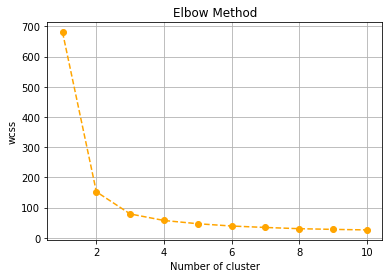

In [142]:
# plotting the "within-cluster sum of square" against cluster range

plt.plot(range(1,11),wcss,'go--' , color='orange')
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('wcss')
plt.grid()
plt.show()

 #### 
As we can see in the graph above the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (wcss) doesn't decrease significantly with every iteration.

Observered that the optimum no. of cluster are '3' here.

In [143]:
# fitting the K-Means clustering on the dataset
model=KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
predictions=model.fit_predict(iris_df)

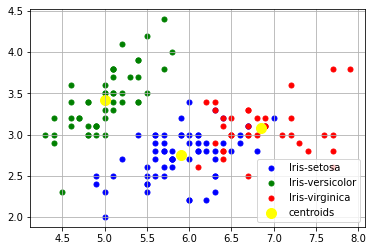

In [144]:
# Visualizing the clusters

x=iris_df.iloc[:,[0,1,2,3]].values
plt.scatter(x[predictions==0,0],x[predictions==0,1],s=25,c='blue', label='Iris-setosa')
plt.scatter(x[predictions==1,0],x[predictions==1,1],s=25,c='green', label='Iris-versicolor')
plt.scatter(x[predictions==2,0],x[predictions==2,1],s=25,c='red', label='Iris-virginica')

# plotting the cluster centers
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],s=100,c='yellow', label='centroids')
plt.legend()
plt.grid()
plt.show()

### Finding the optimum no. of clusters by other method- Heierarchical clustering
  Hierarchical clustering also know as hierarchical cluster analysis is an algorithim that groups similar objects into groups called cluster. The endpoint is a set of clusters, Where each cluster is distinct from each other cluster and the objects within each cluster are broadly similar to each other clusterand the objects within each cluster are broadly similar to each other. Finally we summarize this process in dendogram.
  
### Dendogram: 
 A Dendrogram is a tree-like diagram used to visualize the relationship among clusters. More the distance of the vertical lines in the dendrogram, the more the distance between those clusters. The key to interpreting a dendrogram is to concentrate on the height at which any two objects are joined together.

In [172]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sn

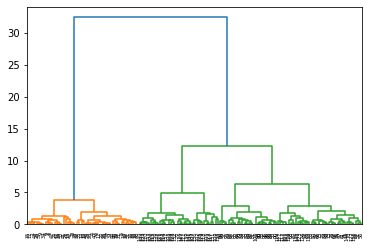

In [173]:
# create dendogram
dendrogram=shc.dendrogram(shc.linkage(iris_df,method='ward'))

### Visualizing the clusters created by hierarchical clustering
    If we cut the dendogram horizontally at yaxis =8 we can clearly see that 03 clusters are getting formed even by the hierarchical clustering method.

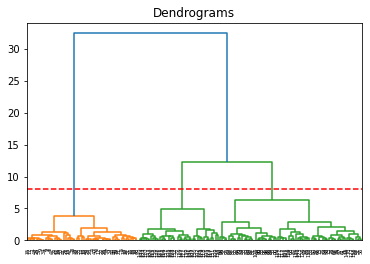

In [176]:
plt.title("Dendrograms")
dend=shc.dendrogram(shc.linkage(iris_df, method ='ward'))
plt.axhline(y=8,color='r',linestyle='--')
plt.show()